In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

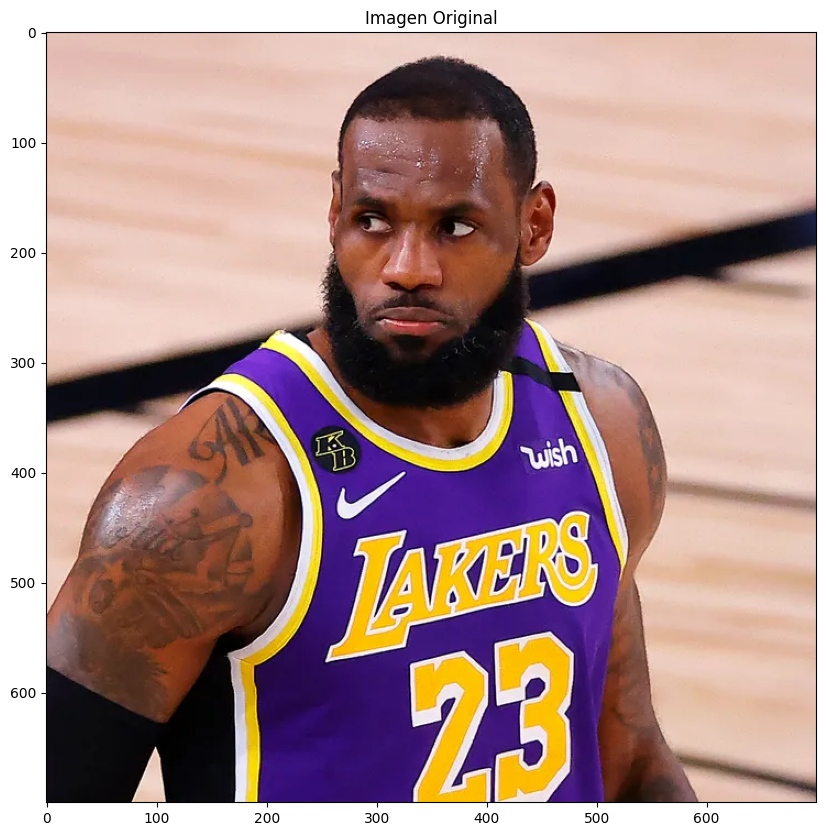

C:\Users\DELL\AppData\Local\Temp\ipykernel_21456\258619192.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


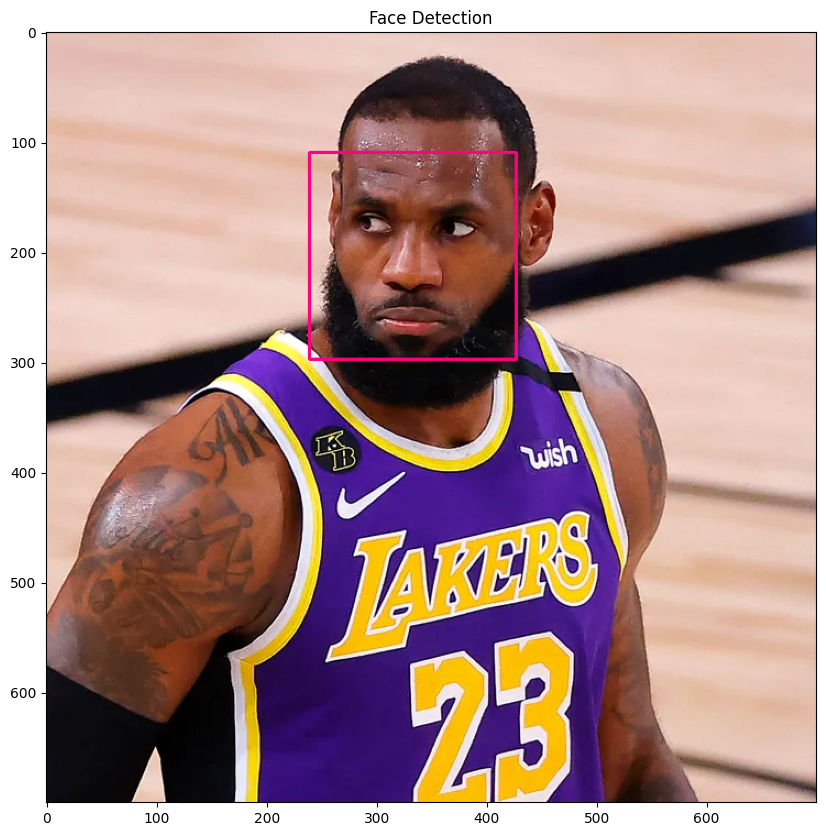

In [8]:
# Usamos la funcio CascadeClassifier 
# El archivo XML del clasificador se guarda en una variable
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Cargamos nuestra imagen y la convertimos a escala de grises
image = cv2.imread('fotos/lebron_3.jpg')
imshow('Imagen Original', image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


#El clasificador regresa el ROI de la cara detectada
#Guarfa la coordenada de la esquina superior izquierda y la coordeada inferior derecha
faces = face_classifier.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)

# Si no se detecta niguna cara al clasificador regresa una Tupla vacia
if faces == ():
    print("No faces found")

#Iteramos sobre las coordenadas y dibujamos un rectangulo sobre cada cara detectada
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (127,0,255), 2)

imshow('Face Detection', image)

C:\Users\DELL\AppData\Local\Temp\ipykernel_21456\2435387043.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if faces == ():


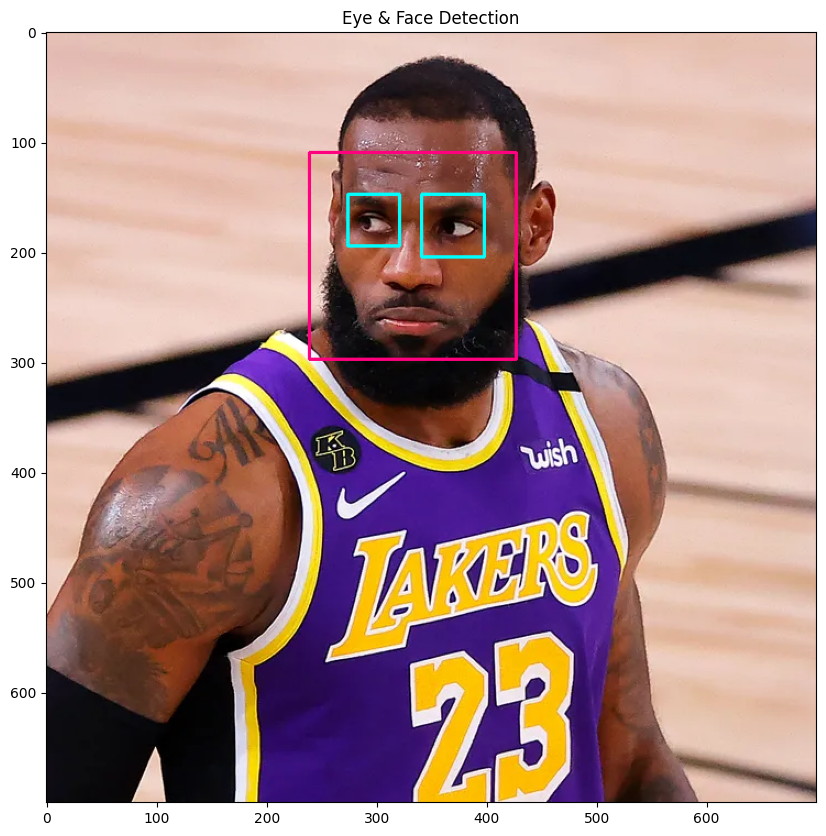

In [10]:
import numpy as np
import cv2

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

img = cv2.imread('fotos/lebron_3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if faces == ():
    print("No Face Found")

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.3, 5)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',img)